# Car Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("car_price.csv")
df.head(5)

,Unnamed: 0,Unnamed: 0.1,Brand,Model,Variant,YOM,Transmission Type,Fuel Type,Kilometers,Owners,Price,Location
0,0,0,Nissan,Micra,NaN,2016,Manual,Petrol,"47,000 km",1st,"4,50,000",Telengana
1,1,1,Maruti Suzuki,Swift,NaN,2016,Manual,Diesel,"63,000 km",1st,"6,10,000",Telengana
2,2,2,Honda,Amaze,NaN,2014,Manual,Diesel,"75,312 km",1st,"4,75,000",Telengana
3,3,3,2018,Omni,NaN,2018,Manual,Petrol,36000.0 km,1st,"3,00,000",Telengana
4,4,4,Toyota,Innova Crysta,NaN,2017,Manual,Diesel,"114,500 km",1st,"17,30,000",Telengana


In [4]:
df.shape

(11203, 12)

# Data Cleaning :

In [5]:
df['Variant'].value_counts()

Series([], Name: Variant, dtype: int64)

In [6]:
#dropping the unwanted columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Variant'], inplace=True, axis = 1)
df.head(5)

,Brand,Model,YOM,Transmission Type,Fuel Type,Kilometers,Owners,Price,Location
0,Nissan,Micra,2016,Manual,Petrol,"47,000 km",1st,"4,50,000",Telengana
1,Maruti Suzuki,Swift,2016,Manual,Diesel,"63,000 km",1st,"6,10,000",Telengana
2,Honda,Amaze,2014,Manual,Diesel,"75,312 km",1st,"4,75,000",Telengana
3,2018,Omni,2018,Manual,Petrol,36000.0 km,1st,"3,00,000",Telengana
4,Toyota,Innova Crysta,2017,Manual,Diesel,"114,500 km",1st,"17,30,000",Telengana


As there were no values, we are dropping variant and Unnamed: 0, Unnamed: 0.1 as a part of cleaning.

In [8]:
df['Kilometers'] = df['Kilometers'].str.replace('km','')
df['Kilometers'] = df['Kilometers'].str.replace(',','')
df['Kilometers'] = df['Kilometers'].str.replace('-','0')
df['Kilometers'] = df['Kilometers'].astype(float)

In [10]:
kmsmean = df['Kilometers'].mean()
kmsmean

65194.43916807998

In [11]:
df['Kilometers'] = df['Kilometers'].apply(lambda x: x if x!=0 else kmsmean)

In [12]:
df['Price'] = df['Price'].str.strip()
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].str.replace('-','0')

df['Price'] = df['Price'].astype(float)

In [13]:
pricemean = df['Price'].mean()
pricemean

600671.9639382309

In [14]:
df['Price'] = df['Price'].apply(lambda x: x if x!=0 else pricemean)

In [15]:
df['YOM'] = df['YOM'].apply(lambda x: int(x.strip()[0:4]) if x!='-' else 0)

median_year=df['YOM'].median()

df['YOM'] = df['YOM'].apply(lambda x: x if x!=0 else median_year)

df['YOM'] = df['YOM'].astype(int)

In [16]:
df['Owners'] = df['Owners'].str.replace('1st','1').replace('2nd','2').replace('3rd','3').replace('4th','4').replace('-','4+')

In [19]:
df['Owners'].value_counts()

1     6455
2     3100
4+    1045
3      488
4      115
Name: Owners, dtype: int64

In [20]:
df['Fuel Type'].value_counts()

Petrol           5307
Diesel           4831
-                 576
CNG & Hybrids     421
LPG                62
Electric            6
Name: Fuel Type, dtype: int64

In [21]:
Fuel_mode = df['Fuel Type'].mode()
Fuel_mode

0    Petrol
dtype: object

In [22]:
df['Fuel Type'] = df['Fuel Type'].apply(lambda x: x if x!='-' else 0)

df['Fuel Type'] = df['Fuel Type'].apply(lambda x: x if x!=0 else "Diesel")

df['Fuel Type'].value_counts()

Diesel           5407
Petrol           5307
CNG & Hybrids     421
LPG                62
Electric            6
Name: Fuel Type, dtype: int64

In [23]:
df['Transmission Type'].value_counts()

Manual       8121
Automatic    2105
-             977
Name: Transmission Type, dtype: int64

In [24]:
df['Transmission Type'] = df['Transmission Type'].apply(lambda x: x if x!='-' else 'Manual')

df['Transmission Type'].value_counts()

Manual       9098
Automatic    2105
Name: Transmission Type, dtype: int64

In [25]:
df['Brand'].value_counts()

Maruti Suzuki                          3098
Hyundai                                1575
Honda                                   750
Mahindra                                745
Toyota                                  727
                                       ... 
110PS Diesel RxZ AWD                      1
2012-2014 E4 BS IV                        1
2000-2003 1.3 EXI                         1
1.8 S MT                                  1
2009-2013 1.3 Emotion Pack (Diesel)       1
Name: Brand, Length: 132, dtype: int64

In [26]:
df['Brand'] = df['Brand'].apply(lambda x: x if x!='-' else 'others')
df['Brand'].value_counts()

Maruti Suzuki                          3098
Hyundai                                1575
Honda                                   750
Mahindra                                745
Toyota                                  727
                                       ... 
110PS Diesel RxZ AWD                      1
2012-2014 E4 BS IV                        1
2000-2003 1.3 EXI                         1
1.8 S MT                                  1
2009-2013 1.3 Emotion Pack (Diesel)       1
Name: Brand, Length: 132, dtype: int64

In [27]:
df['Model'].value_counts()

Swift             488
Swift Dzire       406
-                 372
Others            336
City              311
                 ... 
Indica V2 Xeta      2
Indica Ev2          1
Pajero              1
Optra               1
Bolt                1
Name: Model, Length: 226, dtype: int64

In [28]:
df['Model'] = df['Model'].apply(lambda x: x if x!='-' else 'others')
df['Model'].value_counts()

Swift             488
Swift Dzire       406
others            372
Others            336
City              311
                 ... 
Indica V2 Xeta      2
Indica Ev2          1
Bolt                1
Pajero              1
Optra               1
Name: Model, Length: 226, dtype: int64

In [30]:
df['Location'].value_counts()

Mumbai       3732
kerala       3407
Delhi        3184
Telengana     880
Name: Location, dtype: int64

In [31]:
df.dtypes

Brand                 object
Model                 object
YOM                    int32
Transmission Type     object
Fuel Type             object
Kilometers           float64
Owners                object
Price                float64
Location              object
dtype: object

In [32]:
df.head(10)

,Brand,Model,YOM,Transmission Type,Fuel Type,Kilometers,Owners,Price,Location
0,Nissan,Micra,2016,Manual,Petrol,47000.0,1,450000.0,Telengana
1,Maruti Suzuki,Swift,2016,Manual,Diesel,63000.0,1,610000.0,Telengana
2,Honda,Amaze,2014,Manual,Diesel,75312.0,1,475000.0,Telengana
3,2018,Omni,2018,Manual,Petrol,36000.0,1,300000.0,Telengana
4,Toyota,Innova Crysta,2017,Manual,Diesel,114500.0,1,1730000.0,Telengana
5,Hyundai,Fluidic Verna,2011,Manual,Diesel,73000.0,2,380000.0,Telengana
6,Tata,Tigor JTP,2018,Manual,Diesel,75421.0,1,450000.0,Telengana
7,2007,Verna,2007,Manual,Diesel,82000.0,2,159999.0,Telengana
8,Hyundai,Creta,2015,Automatic,Diesel,81000.0,1,1100000.0,Telengana
9,Maruti Suzuki,Wagon R,2020,Manual,Petrol,23262.0,1,600000.0,Telengana


In [34]:
list(df.columns)

['Brand',
 'Model',
 'YOM',
 'Transmission Type',
 'Fuel Type',
 'Kilometers',
 'Owners',
 'Price',
 'Location']

In [35]:
df = df[['Brand', 'Model', 'YOM', 'Transmission Type', 'Fuel Type', 'Kilometers', 'Owners', 'Location', 'Price']]
df.sample(5)

,Brand,Model,YOM,Transmission Type,Fuel Type,Kilometers,Owners,Location,Price
3376,Maruti Suzuki,Wagon R,2017,Manual,CNG & Hybrids,55685.0,1,Delhi,338000.0
2213,Honda,City,2010,Manual,Petrol,65000.0,1,Delhi,338000.0
4214,Mahindra,Bolero,2018,Manual,Diesel,28900.0,2,kerala,840000.0
10092,Toyota,Etios Liva,2012,Manual,Diesel,70592.0,1,Mumbai,380000.0
8539,Maruti Suzuki,Ertiga,2013,Manual,Diesel,74000.0,1,Mumbai,570000.0


In [36]:
(df['Brand'] == 'others').sum()

372

In [37]:
df.shape

(11203, 9)

In [39]:
drop689 = df[df['Brand'] == 'others'].index
df.drop(drop689, inplace = True)

In [40]:
df.shape

(10831, 9)

In [41]:
(df['Brand'] == 'others').sum()

0

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10831 entries, 0 to 11202
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              10831 non-null  object 
 1   Model              10831 non-null  object 
 2   YOM                10831 non-null  int32  
 3   Transmission Type  10831 non-null  object 
 4   Fuel Type          10831 non-null  object 
 5   Kilometers         10831 non-null  float64
 6   Owners             10831 non-null  object 
 7   Location           10831 non-null  object 
 8   Price              10831 non-null  float64
dtypes: float64(2), int32(1), object(6)
memory usage: 803.9+ KB


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YOM,10831.0,2013.014034,4.722609,1966.0,2011.0,2013.0,2016.0,2021.0
Kilometers,10831.0,67854.945318,63583.864017,1.0,41000.0,61000.0,81250.0,991027.0
Price,10831.0,621302.558582,793819.320369,15000.0,240000.0,420000.0,692400.0,13500000.0


In [44]:
df.describe(include='object').T

,count,unique,top,freq
Brand,10831,131,Maruti Suzuki,3098
Model,10831,225,Swift,488
Transmission Type,10831,2,Manual,8726
Fuel Type,10831,5,Petrol,5307
Owners,10831,5,1,6455
Location,10831,4,Mumbai,3516


# Handling the Null Values :

In [45]:
#checking the null values 
for col in df.columns:print("\nTitle :",col,"\nNaN val:",df[col].isnull().sum())


Title : Brand 
NaN val: 0

Title : Model 
NaN val: 0

Title : YOM 
NaN val: 0

Title : Transmission Type 
NaN val: 0

Title : Fuel Type 
NaN val: 0

Title : Kilometers 
NaN val: 0

Title : Owners 
NaN val: 0

Title : Location 
NaN val: 0

Title : Price 
NaN val: 0


<AxesSubplot:>

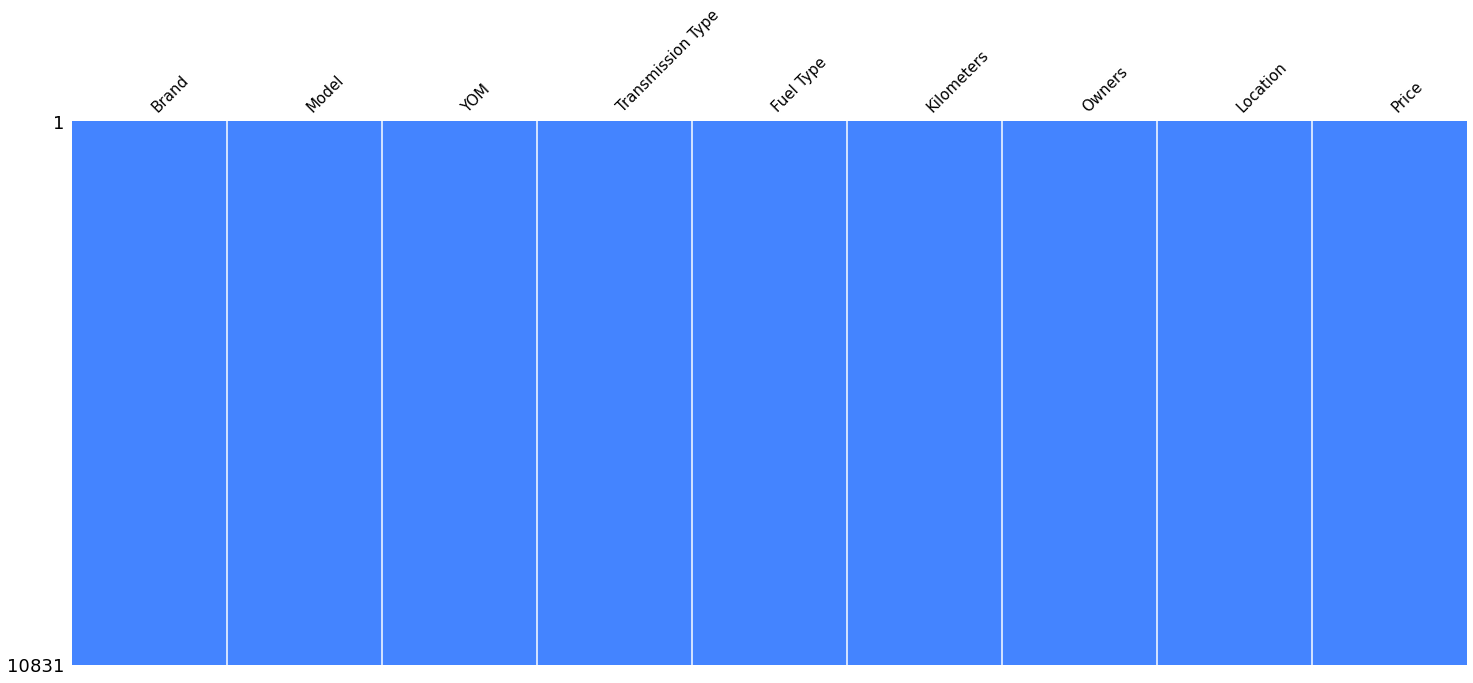

In [46]:
import missingno as msno
msno.matrix(df,labels=True, sparkline=False, figsize=(25,10), fontsize=15, color=(0.27, 0.52, 1.0))

# Catagorical Variables :

In [47]:
cat_List = [x for x in df.columns if df[x].dtype==object]
list (cat_List)

['Brand', 'Model', 'Transmission Type', 'Fuel Type', 'Owners', 'Location']

# Continous Variables :

In [48]:
num_List = [x for x in df.columns if x not in cat_List]
list (num_List)

['YOM', 'Kilometers', 'Price']

# DATA VISUALIZATION :

UNI-VARIATE ANALYSIS :

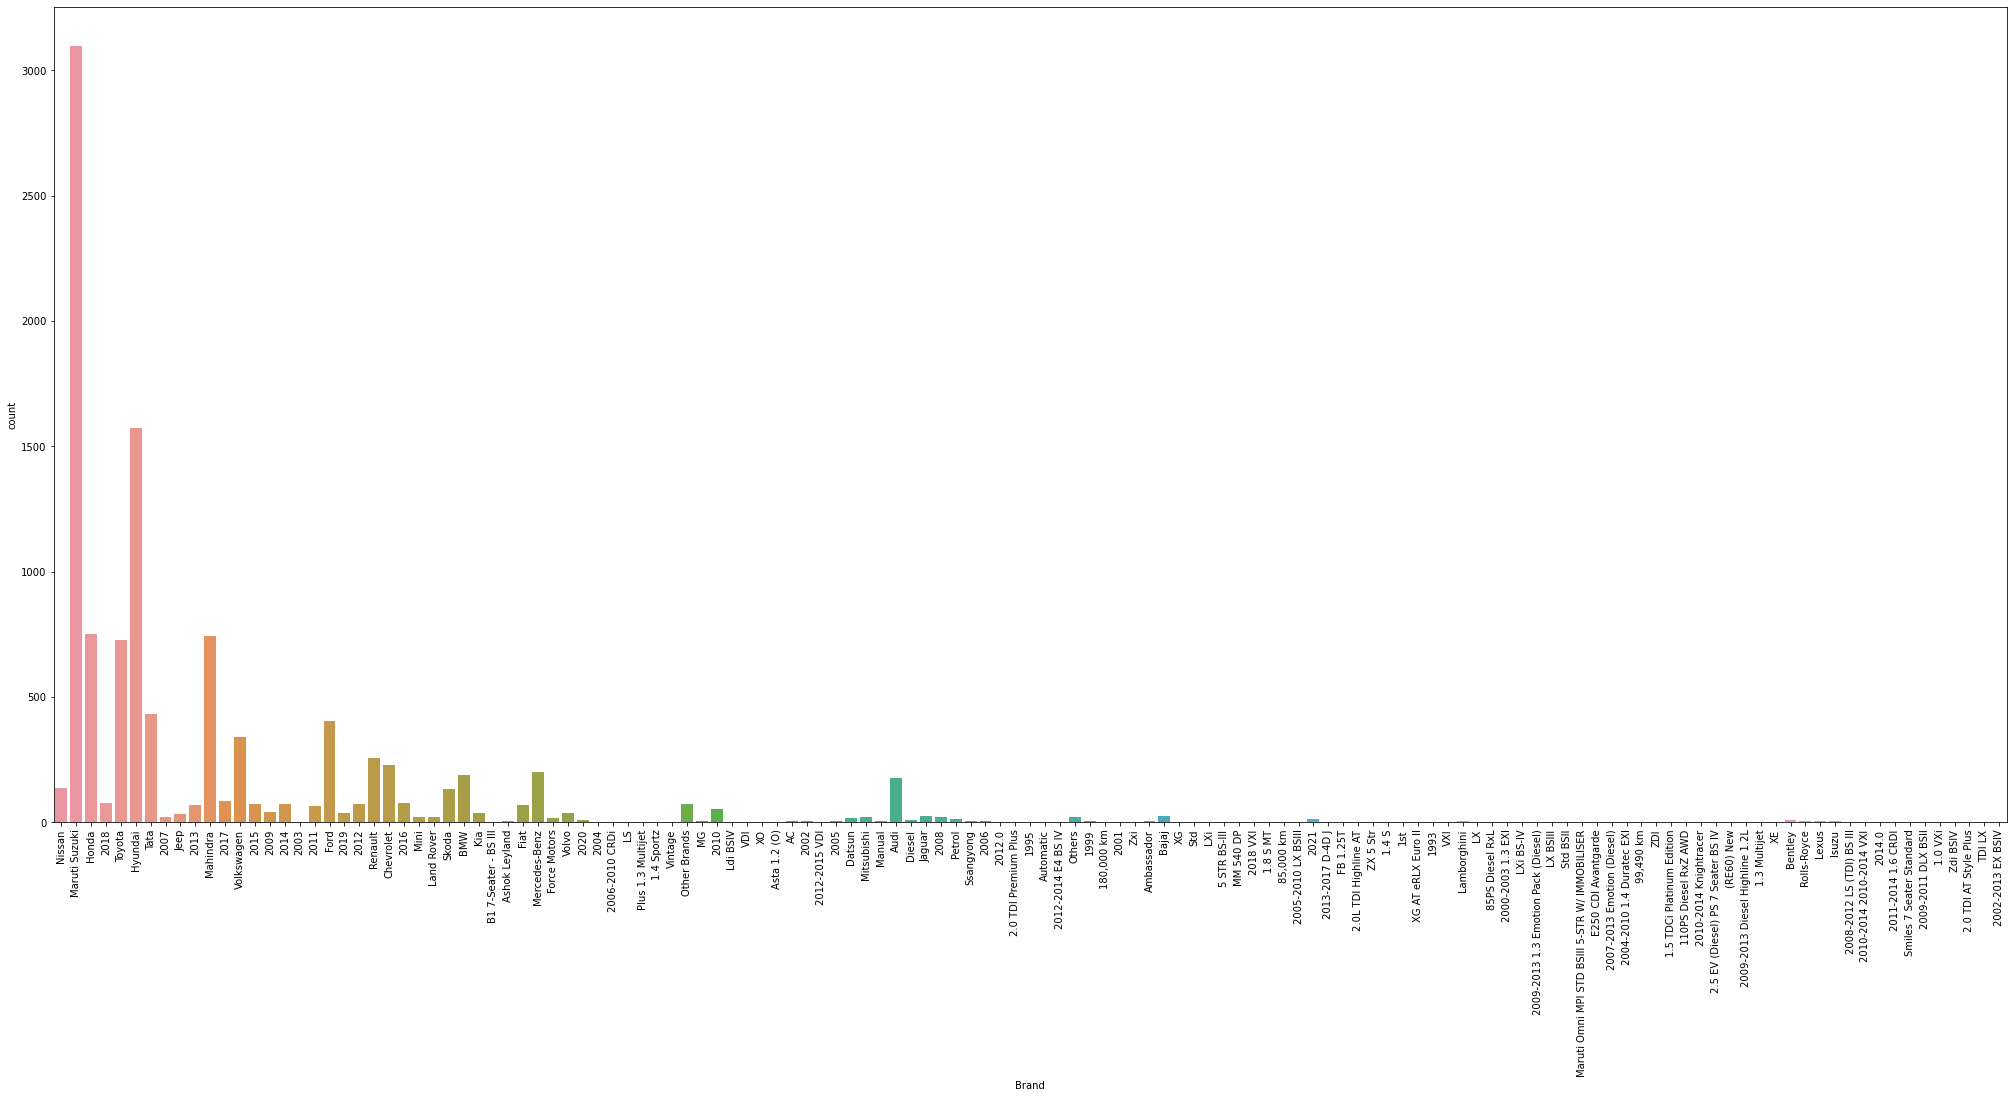

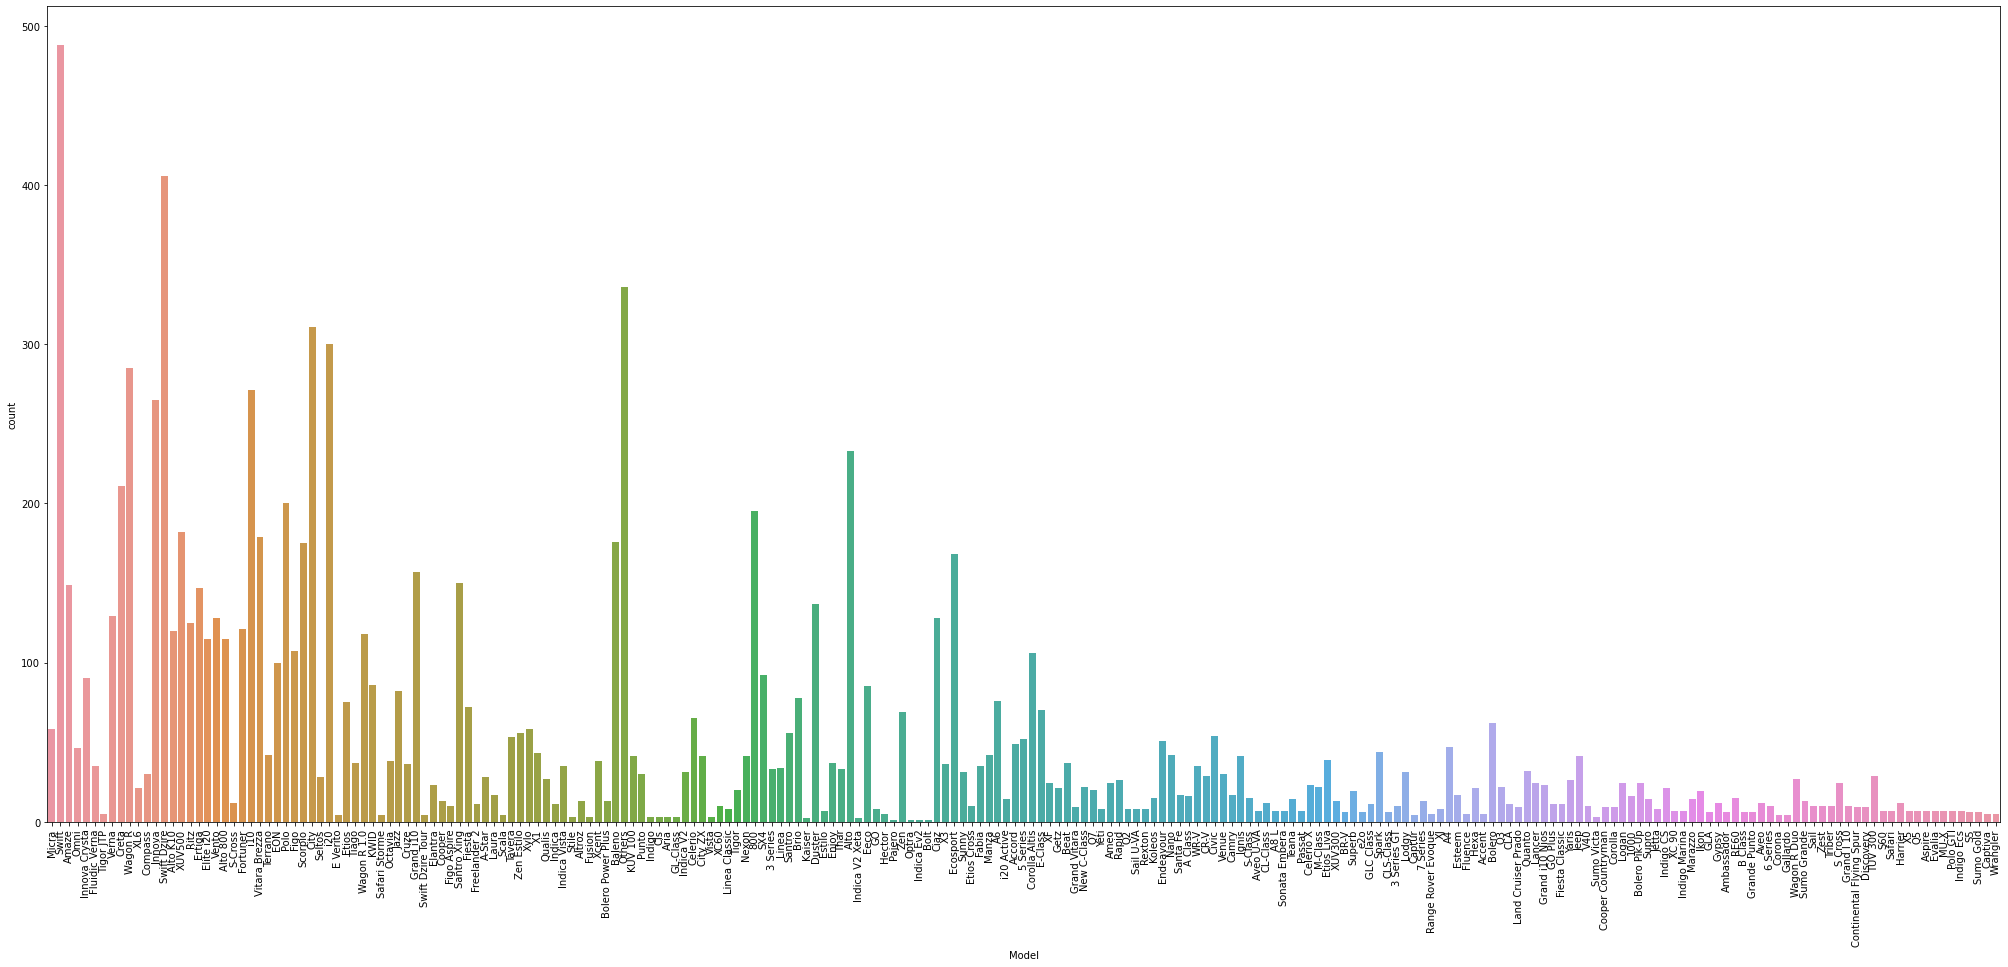

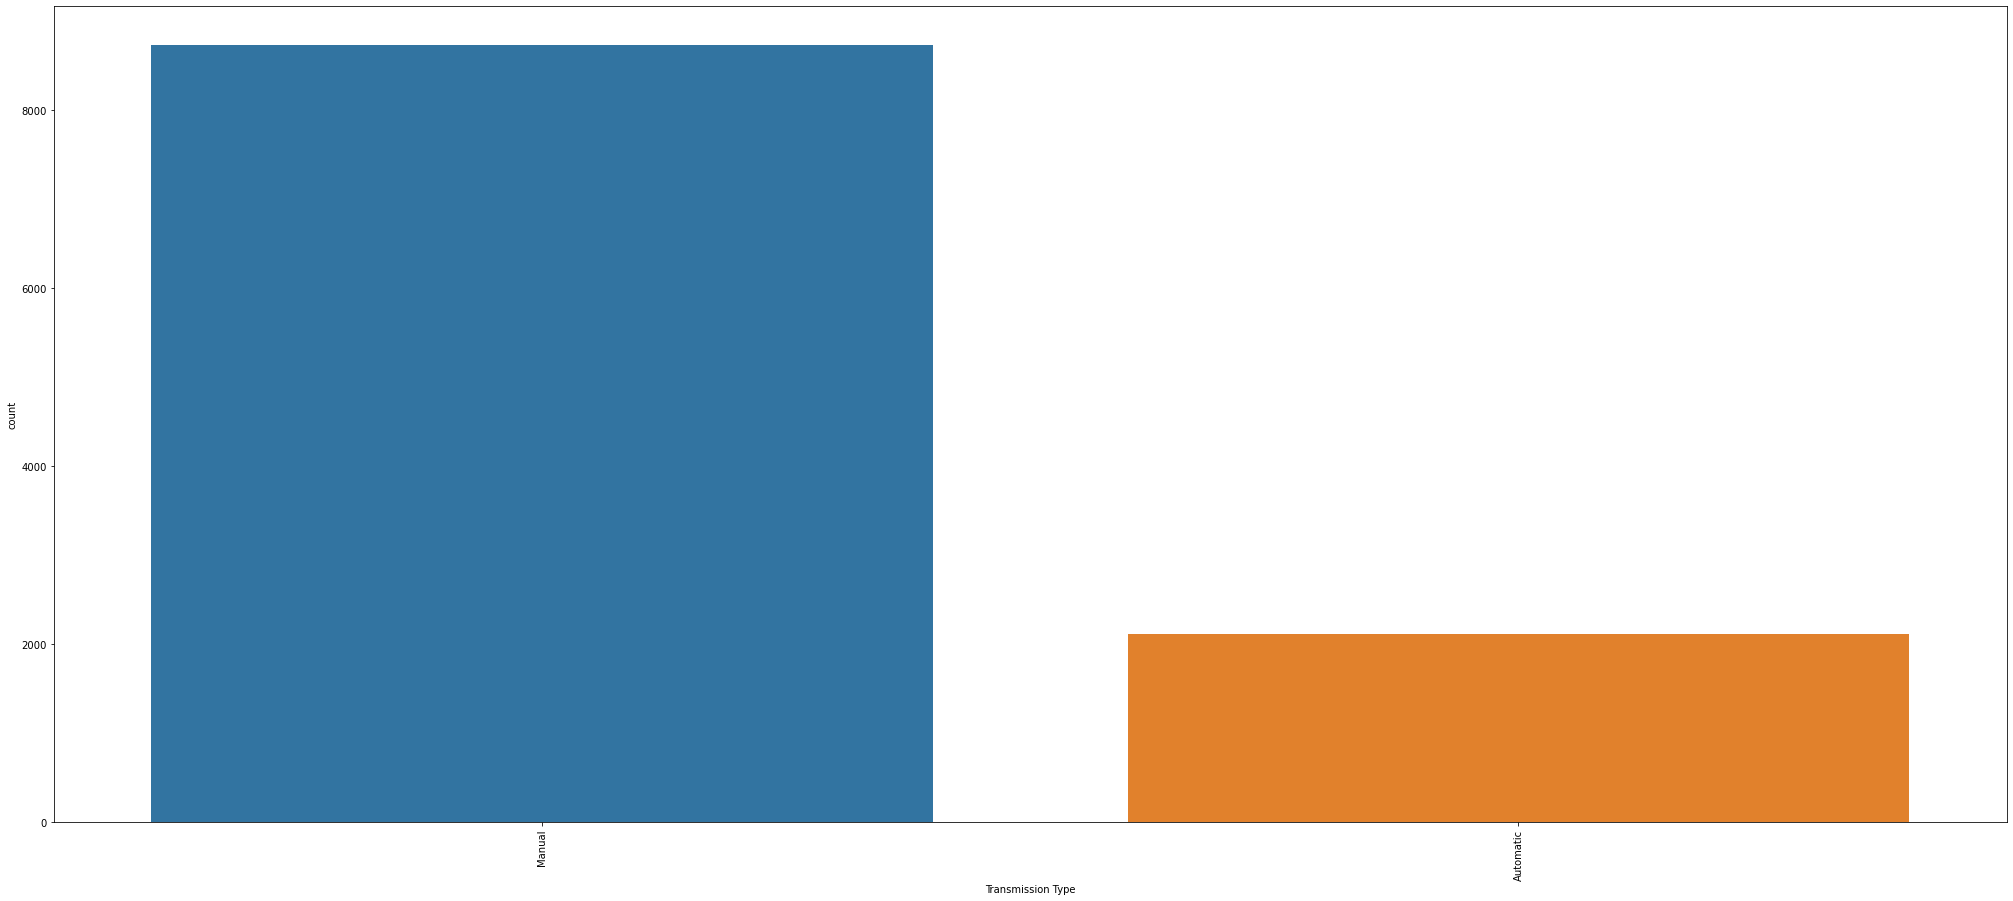

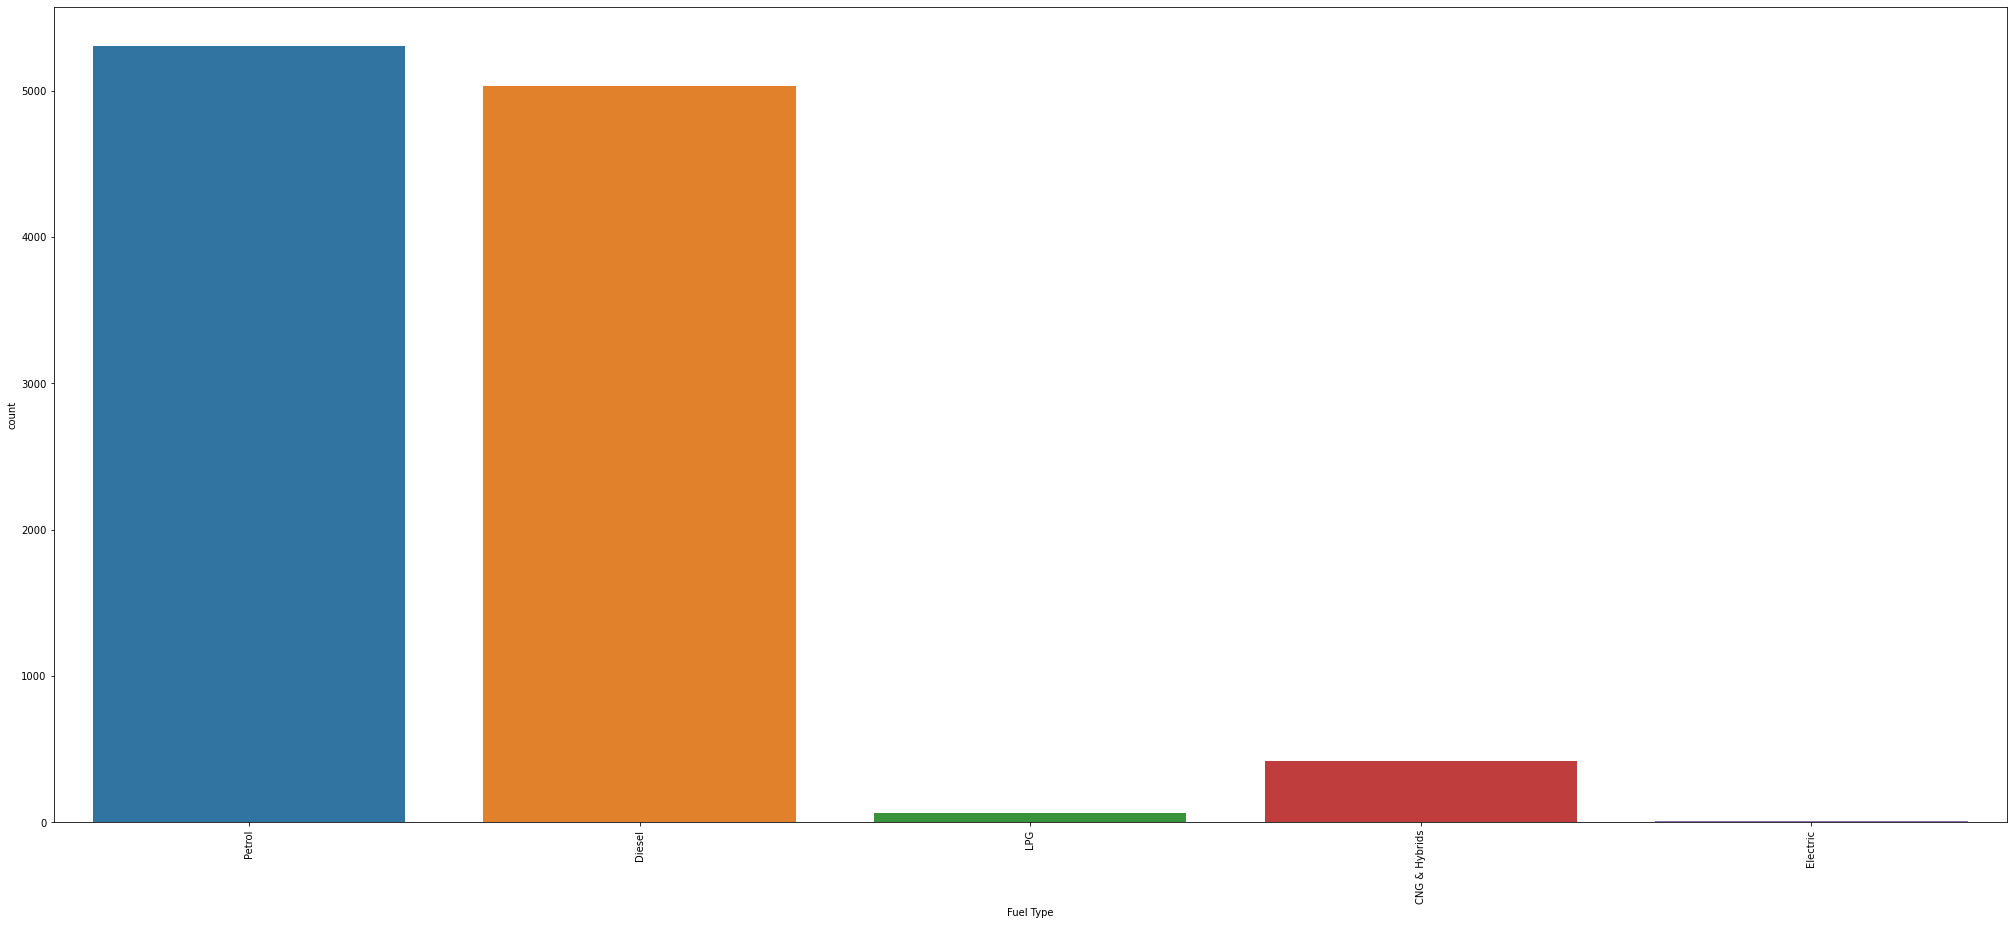

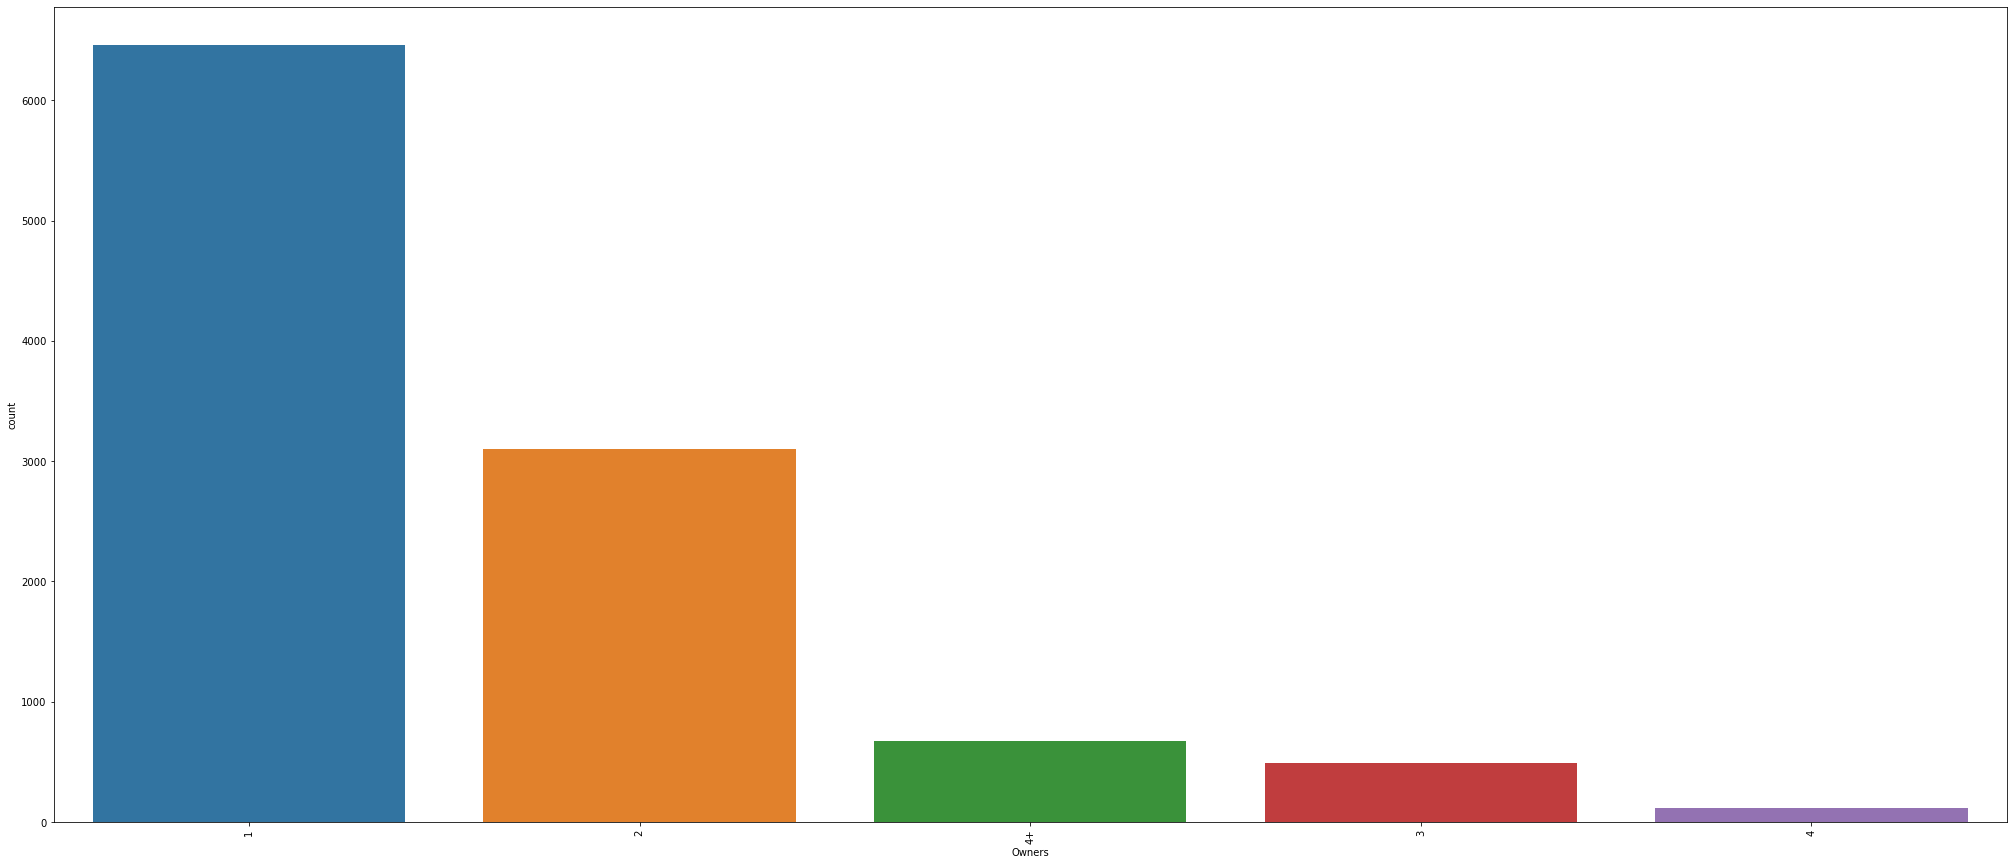

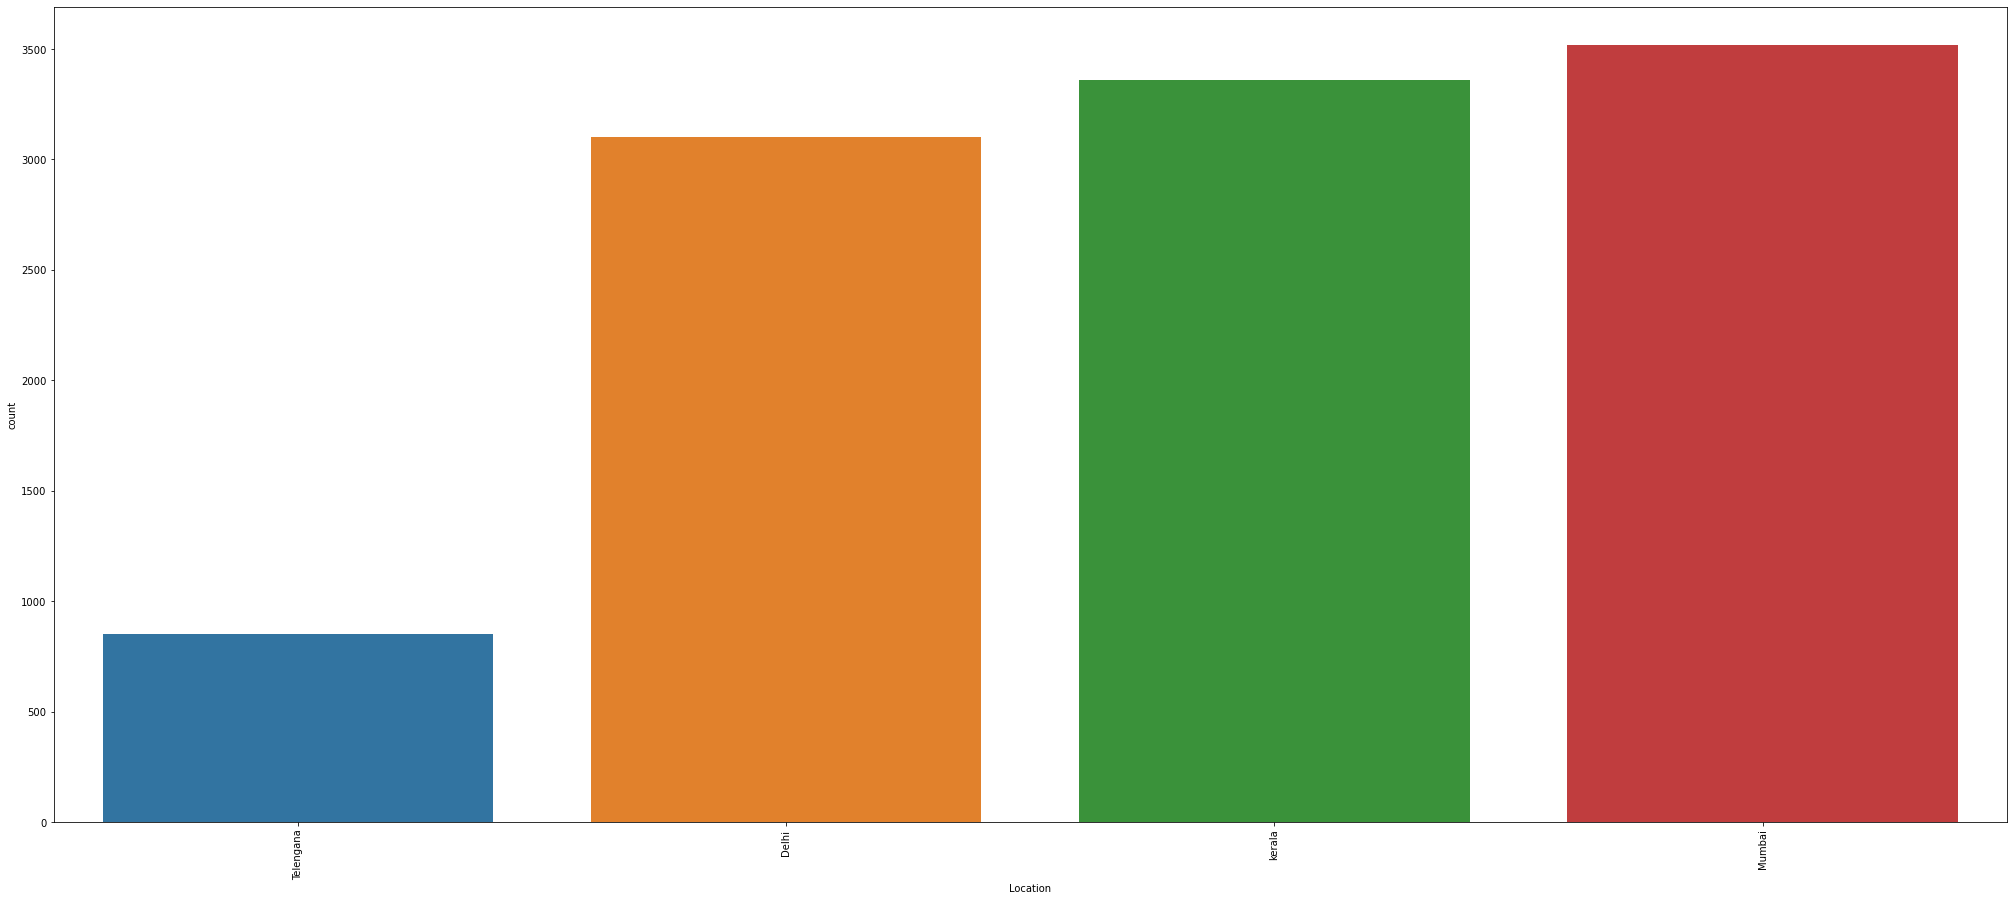

In [49]:
for i in cat_List:
    plt.figure(figsize=(35,15))
    sn.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

# BI-VARIATE ANALYSIS :

<Figure size 2160x1800 with 0 Axes>

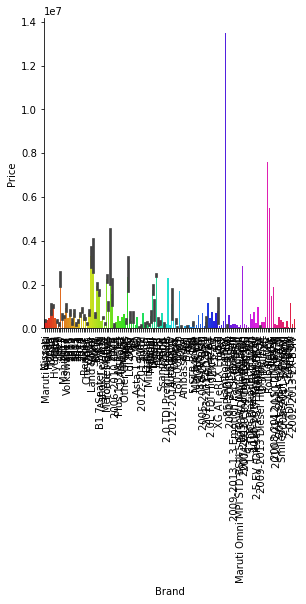

<Figure size 2160x1800 with 0 Axes>

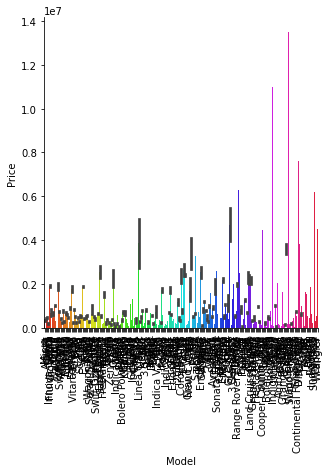

<Figure size 2160x1800 with 0 Axes>

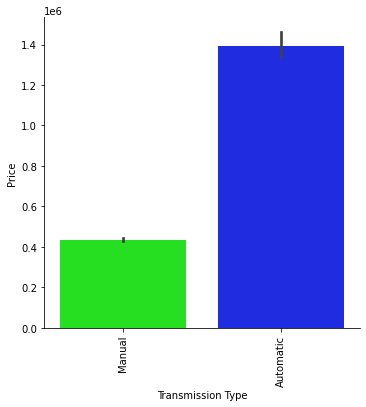

<Figure size 2160x1800 with 0 Axes>

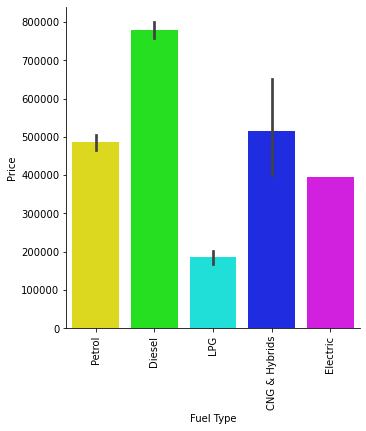

<Figure size 2160x1800 with 0 Axes>

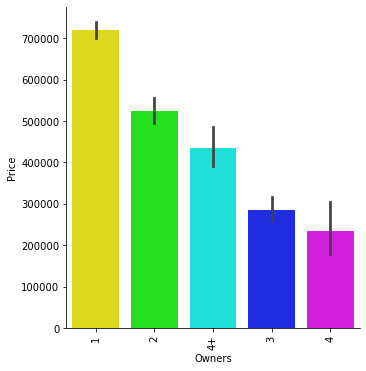

<Figure size 2160x1800 with 0 Axes>

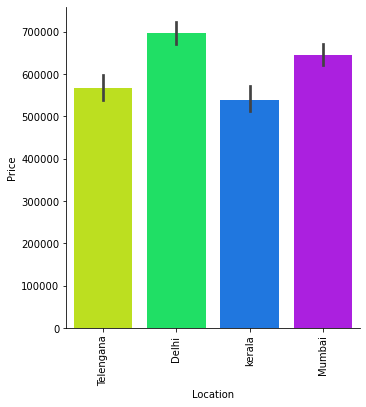

In [50]:
for i in cat_List:
    plt.figure(figsize=(30,25))
    sn.catplot(y='Price',x=i,data=df,kind="bar",palette="hsv")
    plt.xticks(rotation=90)
    plt.show()

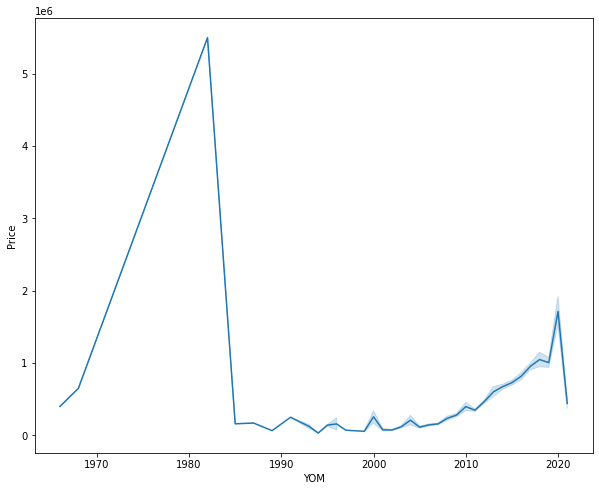

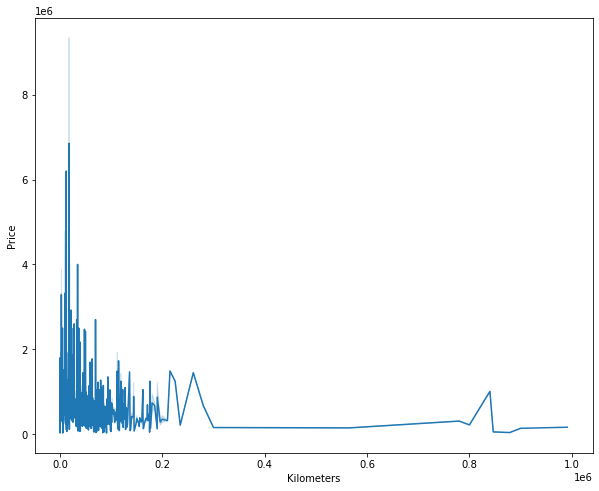

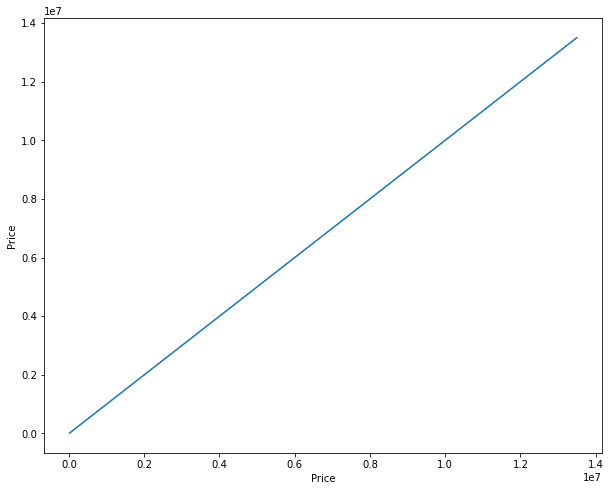

In [51]:
for i in num_List:
    plt.figure(figsize=(10,8))
    sn.lineplot(y='Price',x=i,data=df)
    plt.show()

In [52]:
df.head(0)

,Brand,Model,YOM,Transmission Type,Fuel Type,Kilometers,Owners,Location,Price


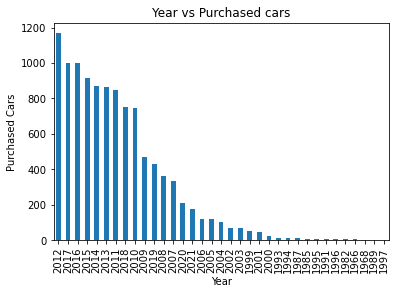

In [53]:
#Plotting year vs no of cars
purchased_car_per_year = df['YOM'].value_counts()
purchased_car_per_year.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Purchased Cars")
plt.title("Year vs Purchased cars")
plt.show()

# Feature Engineering:

# Now we will use Label Encoder to change catagorical values to Numerical values.
# LabelEncoder


In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_List:
    df[i] = le.fit_transform(df[i].astype(str))
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10831 entries, 0 to 11202
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              10831 non-null  int32  
 1   Model              10831 non-null  int32  
 2   YOM                10831 non-null  int32  
 3   Transmission Type  10831 non-null  int32  
 4   Fuel Type          10831 non-null  int32  
 5   Kilometers         10831 non-null  float64
 6   Owners             10831 non-null  int32  
 7   Location           10831 non-null  int32  
 8   Price              10831 non-null  float64
dtypes: float64(2), int32(7)
memory usage: 808.1 KB
None


In [56]:
df.head()

,Brand,Model,YOM,Transmission Type,Fuel Type,Kilometers,Owners,Location,Price
0,103,132,2016,1,4,47000.0,0,2,450000.0
1,99,181,2016,1,1,63000.0,0,2,610000.0
2,79,18,2014,1,1,75312.0,0,2,475000.0
3,52,137,2018,1,4,36000.0,0,2,300000.0
4,117,113,2017,1,1,114500.0,0,2,1730000.0


In [57]:
df.describe() 

,Brand,Model,YOM,Transmission Type,Fuel Type,Kilometers,Owners,Location,Price
count,10831.000000,10831.000000,10831.000000,10831.000000,10831.000000,10831.000000,10831.000000,10831.000000,1.083100e+04
mean,90.286769,118.018466,2013.014034,0.805650,2.443080,67854.945318,0.656726,1.412797,6.213026e+05
std,19.998493,69.741590,4.722609,0.395717,1.545931,63583.864017,1.060658,1.198236,7.938193e+05
min,0.000000,0.000000,1966.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.500000e+04
25%,79.000000,55.000000,2011.000000,1.000000,1.000000,41000.000000,0.000000,0.000000,2.400000e+05
50%,99.000000,120.000000,2013.000000,1.000000,1.000000,61000.000000,0.000000,1.000000,4.200000e+05
75%,99.000000,182.000000,2016.000000,1.000000,4.000000,81250.000000,1.000000,3.000000,6.924000e+05
max,130.000000,224.000000,2021.000000,1.000000,4.000000,991027.000000,4.000000,3.000000,1.350000e+07


In [58]:
corr=df.corr()  
corr

,Brand,Model,YOM,Transmission Type,Fuel Type,Kilometers,Owners,Location,Price
Brand,1.000000,0.069915,0.013322,0.104178,-0.062637,0.029175,0.015933,0.078849,-0.019144
Model,0.069915,1.000000,0.012423,0.107459,-0.080642,-0.036142,-0.029106,-0.040628,-0.055490
YOM,0.013322,0.012423,1.000000,-0.145532,-0.095909,-0.322429,-0.297333,-0.171245,0.298633
Transmission Type,0.104178,0.107459,-0.145532,1.000000,-0.001406,0.031482,0.096007,0.119166,-0.478714
Fuel Type,-0.062637,-0.080642,-0.095909,-0.001406,1.000000,-0.173711,0.014437,0.027465,-0.162877
Kilometers,0.029175,-0.036142,-0.322429,0.031482,-0.173711,1.000000,0.118884,0.172189,-0.125985
Owners,0.015933,-0.029106,-0.297333,0.096007,0.014437,0.118884,1.000000,0.121678,-0.138689
Location,0.078849,-0.040628,-0.171245,0.119166,0.027465,0.172189,0.121678,1.000000,-0.080525
Price,-0.019144,-0.055490,0.298633,-0.478714,-0.162877,-0.125985,-0.138689,-0.080525,1.000000


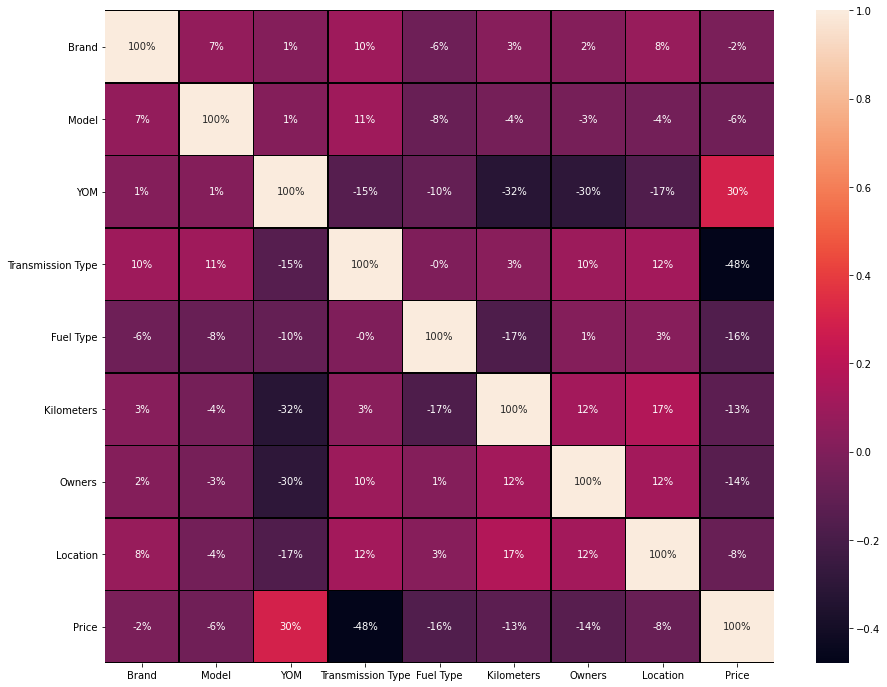

In [59]:
plt.figure(figsize=(15,12))
sn.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',annot=True)
plt.show()

Text(0.5, 1.0, 'Correlation with Target variable')

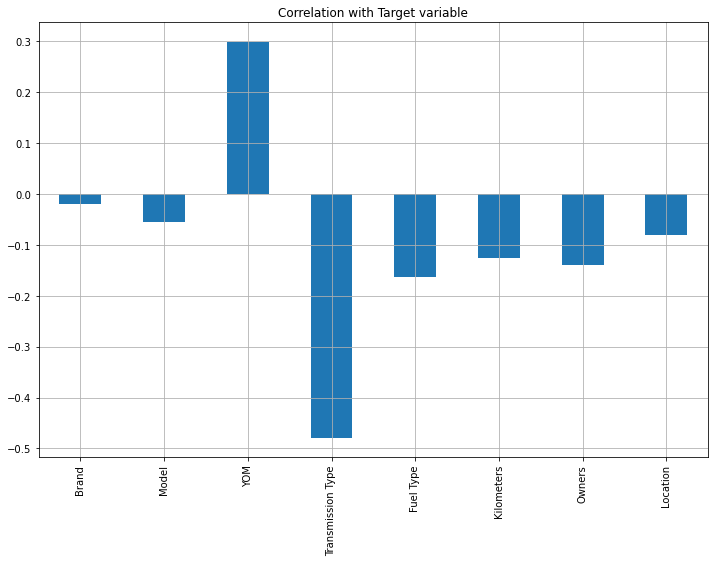

In [61]:
plt.figure(figsize=(12,8))
df.drop('Price',axis=1).corrwith(df['Price']).plot(kind='bar',grid=True)
plt.title('Correlation with Target variable')

# Checking skewness :

In [62]:
#checking the skewness
df.skew()

Brand               -0.877003
Model               -0.077267
YOM                 -1.839711
Transmission Type   -1.545077
Fuel Type           -0.030781
Kilometers           7.942945
Owners               2.020776
Location             0.247629
Price                5.800779
dtype: float64

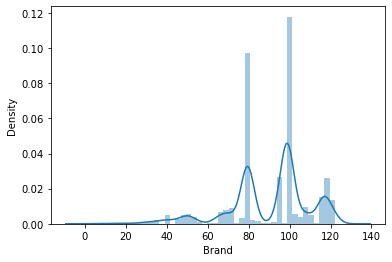

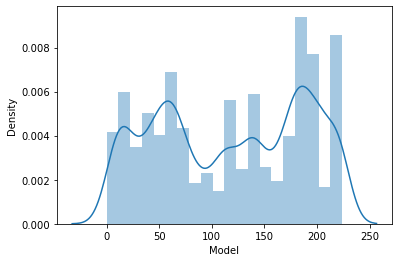

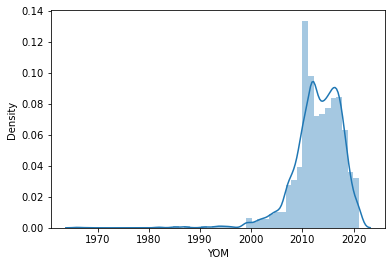

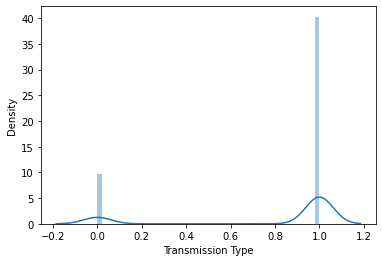

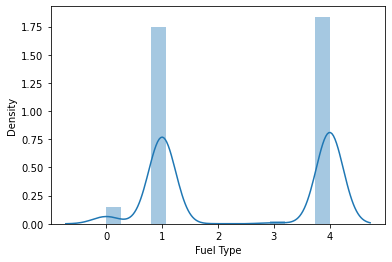

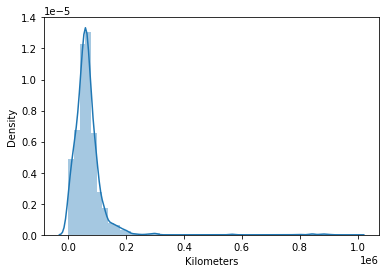

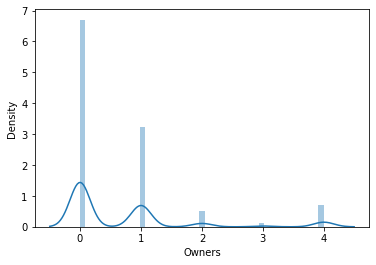

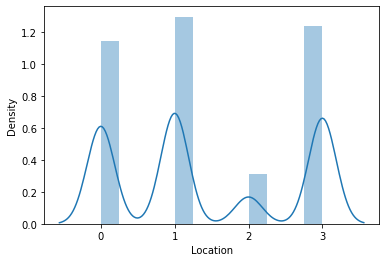

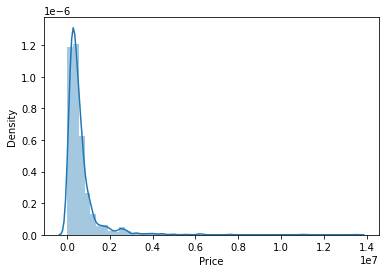

In [63]:
#Plotting distplot for checking the distribution of skewness
for col in df.describe().columns:
    sn.distplot(df[col])
    plt.show()

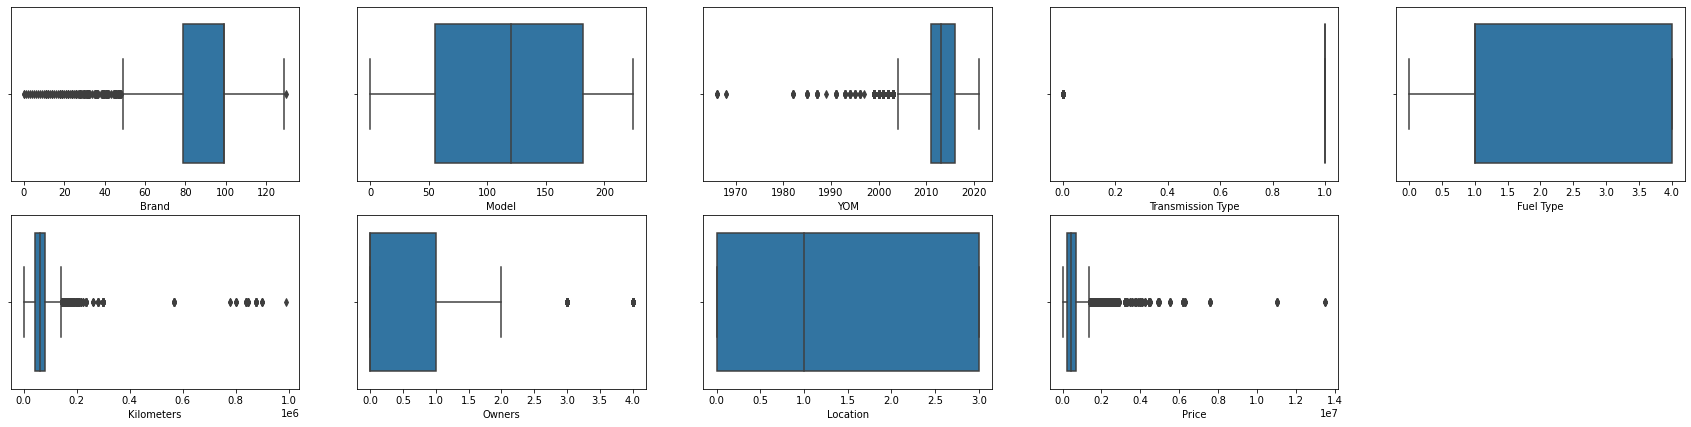

In [64]:
collist=df.columns.values
ncol=5
nrow=8
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.boxplot(df[collist[i]])

In [65]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))  
threshold=3    
np.where(z>3)

(array([    7,    13,    14, ..., 10805, 10811, 10813], dtype=int64),
 array([0, 6, 6, ..., 0, 0, 6], dtype=int64))

In [66]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
df_new

,Brand,Model,YOM,Transmission Type,Fuel Type,Kilometers,Owners,Location,Price
0,103,132,2016,1,4,47000.0,0,2,450000.0
1,99,181,2016,1,1,63000.0,0,2,610000.0
2,79,18,2014,1,1,75312.0,0,2,475000.0
3,52,137,2018,1,4,36000.0,0,2,300000.0
4,117,113,2017,1,1,114500.0,0,2,1730000.0
...,...,...,...,...,...,...,...,...,...
11198,116,107,2012,1,1,170000.0,1,1,210000.0
11199,96,30,2016,1,1,140000.0,0,1,675000.0
11200,99,200,2006,1,4,22000.0,0,1,85000.0
11201,108,58,2019,0,1,32671.0,0,1,1075000.0


In [68]:
df.shape   

(10831, 9)

In [69]:
df_new.shape

(9748, 9)

In [70]:
dfshape = 15261
dfnewshape = 14188
total = dfshape-dfnewshape
percentage_loss=((total)/dfshape)*100   
print(percentage_loss)

7.030994037088003


In [71]:
df_x=df_new.drop('Price',axis=1) #Independent variables
y=df_new['Price'] #Target Variable

In [72]:
#Checking x data
df_x.head()

,Brand,Model,YOM,Transmission Type,Fuel Type,Kilometers,Owners,Location
0,103,132,2016,1,4,47000.0,0,2
1,99,181,2016,1,1,63000.0,0,2
2,79,18,2014,1,1,75312.0,0,2
3,52,137,2018,1,4,36000.0,0,2
4,117,113,2017,1,1,114500.0,0,2


In [73]:
#Checking y data after splitting
y.head()

0     450000.0
1     610000.0
2     475000.0
3     300000.0
4    1730000.0
Name: Price, dtype: float64

# Treating skewness :

In [74]:
for col in df_x.skew().index:
    if col in df_x.describe().columns:
        if df_x[col].skew()>0.55:
            df_x[col]=np.sqrt(df_x[col])
        if df_x[col].skew()<-0.55:
            df_x[col]=np.sqrt(df_x[col])

In [75]:
df_x.skew() 

Brand               -1.088658
Model               -0.090624
YOM                 -0.636886
Transmission Type   -1.582465
Fuel Type           -0.041883
Kilometers          -0.339388
Owners               0.752339
Location             0.278608
dtype: float64

# Scaling the data : 

In [76]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Brand,Model,YOM,Transmission Type,Fuel Type,Kilometers,Owners,Location
0,0.629551,0.183891,0.672881,0.483980,1.002721,-0.332919,-0.731494,0.508883
1,0.443795,0.887518,0.672881,0.483980,-0.934491,0.117585,-0.731494,0.508883
2,-0.547143,-1.453118,0.175986,0.483980,-0.934491,0.426222,-0.731494,0.508883
3,-2.112487,0.255689,1.169530,0.483980,1.002721,-0.689314,-0.731494,0.508883
4,1.252819,-0.088944,0.921236,0.483980,-0.934491,1.268510,-0.731494,0.508883
...,...,...,...,...,...,...,...,...
9743,1.209581,-0.175102,-0.321156,0.483980,-0.934491,2.242300,1.166938,-0.337635
9744,0.302002,-1.280802,0.672881,0.483980,-0.934491,1.739879,-0.731494,-0.337635
9745,0.443795,1.160352,-1.814067,0.483980,1.002721,-1.234778,-0.731494,-0.337635
9746,0.856745,-0.878729,1.417762,-2.066202,-0.934491,-0.807665,-0.731494,-0.337635


# Model Building : 

In [77]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [78]:
for i in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=69,test_size=.20)

In [80]:
LR=LinearRegression()
l=Lasso()
en=ElasticNet()
rd=Ridge()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()

In [81]:
models= []
models.append(('Linear Regression',LR))
models.append(('Lasso Regression',l))
models.append(('Elastic Net Regression',en))
models.append(('Ridge Regression',rd))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))
models.append(('RandomForestRegressor',rf))
models.append(('AdaBoostRegressor',ab))
models.append(('GradientBoostingRegressor',gb))

In [82]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
sd=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('r2_score: ',AS)
    score.append(AS*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=5,scoring='r2').std()
    print('Standard Deviation: ',std)
    sd.append(std)
    print('\n')
    MAE=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


r2_score:  0.45846326248177804


Standard Deviation:  0.02276578134712635


Mean Absolute Error:  242050.44124113655


Mean Squared Error:  138307582813.19135


Root Mean Squared Error:  371897.274543914



****************************** Lasso Regression ***************************


Lasso()


r2_score:  0.45846305001985277


Standard Deviation:  0.022765022568250342


Mean Absolute Error:  242050.0946230729


Mean Squared Error:  138307637075.614


Root Mean Squared Error:  371897.3474974163



****************************** Elastic Net Regression ***************************


ElasticNet()


r2_score:  0.41494506707112355


Standard Deviation:  0.008196030081701155


Mean Absolute Error:  245801.8077786451


Mean Squared Error:  149422057600.67004


Root Mean Squared Error:  386551.4941125827



****************************** Ridge Regression ***************************


Ridge()


r2_s

In [83]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'r2_score': score, 'Standard_deviation':sd,
                    'Mean_absolute_error':mae, 'Mean_squared_error':mse, 'Root_Mean_Squared_error':rmse})
result

,Model,r2_score,Standard_deviation,Mean_absolute_error,Mean_squared_error,Root_Mean_Squared_error
0,Linear Regression,45.846326,0.022766,242050.441241,1.383076e+11,371897.274544
1,Lasso Regression,45.846305,0.022765,242050.094623,1.383076e+11,371897.347497
2,Elastic Net Regression,41.494507,0.008196,245801.807779,1.494221e+11,386551.494113
3,Ridge Regression,45.846113,0.022750,242045.110793,1.383081e+11,371898.005933
4,Decision Tree Regressor,94.333328,0.080592,12385.723571,1.447259e+10,120302.062708
5,KNeighbors Regressor,90.688914,0.086559,56455.760308,2.378036e+10,154208.816998
6,RandomForestRegressor,97.385533,0.051302,15800.798717,6.677305e+09,81714.780135
7,AdaBoostRegressor,55.668027,0.039563,230093.833450,1.132231e+11,336486.438843
8,GradientBoostingRegressor,80.791295,0.030218,139579.389164,4.905871e+10,221492.016747


# Hyperparameter Tuning :

In [85]:
parameters={'criterion':['mse','mae'],'n_estimators':[50,100,500],'max_features':['auto','sqrt','log2']}

In [87]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestRegressor()
rand=RandomizedSearchCV(rf,parameters,cv=5,scoring='r2')
rand.fit(x_train,y_train)
print(rand.best_params_)  
print(rand.best_score_) 

{'n_estimators': 100, 'max_features': 'log2', 'criterion': 'mae'}
0.9750320177500681


In [88]:
RF=RandomForestRegressor(random_state=48, n_estimators=500, criterion='mse', max_features='log2')
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score: ',r2_score(y_test,pred)*100)
print('Standard deviation: ',cross_val_score(RF,x,y,cv=5,scoring='r2').std())
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  98.34777341783554
Standard deviation:  0.0482617370761173
Mean absolute error:  14913.221188537622
Mean squared error:  4219759233.4384995
Root Mean squared error:  64959.67390187931


# Finalizing the model : 

In [89]:
rf_prediction=RF.predict(x)
print('Predictions of Random Forest Regressor: ',rf_prediction)

Predictions of Random Forest Regressor:  [ 443492.  610810.  476178. ...   85060. 1081356.  347991.]


In [90]:
predictions=pd.DataFrame({'Original_price':y, 'Predicted_price':rf_prediction})
predictions

,Original_price,Predicted_price
0,450000.0,4.434920e+05
1,610000.0,6.108100e+05
2,475000.0,4.761780e+05
3,300000.0,3.330700e+05
4,1730000.0,1.728584e+06
...,...,...
11198,210000.0,2.106700e+05
11199,675000.0,6.748480e+05
11200,85000.0,8.506000e+04
11201,1075000.0,1.081356e+06


#### Saving the model :

In [91]:
import pickle
filename='Car_Price.pkl'   #Specifying the filename
pickle.dump(RF,open(filename,'wb'))

In [80]:
results=pd.DataFrame(rf_prediction)
results.to_csv('Car_Price_Prediction_Results.csv')